In [366]:
import cv2
import sys
import matplotlib.pyplot as plt
import numpy as np
import random

In [3]:
import zipfile
with zipfile.ZipFile('output.zip', 'r') as archive:
        archive.extractall()

In [235]:
img.mean()

7.659124240519589

In [237]:
img.mean()

148.21365710841297

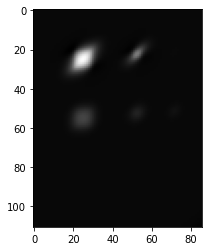

In [278]:
img = cv2.imread('./02_output/350.png',1)
plt.imshow(img)

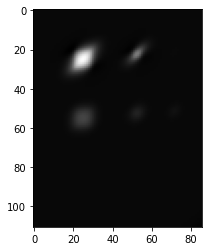

In [279]:
plt.imshow(img,cmap='gray')

In [285]:
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img[:,:,0], (7, 7), 0)

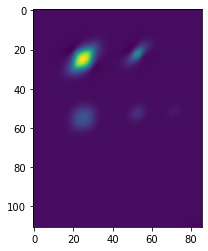

In [286]:
plt.imshow(img[:,:,0])

In [258]:
cut_blur = blurred[30:,30:,0]

In [284]:
img.shape

(111, 86, 3)

In [308]:
th3 = cv2.adaptiveThreshold(img[:,:,0],255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY_INV,111,2)

In [318]:
(T, threshInv) = cv2.threshold(img[:,:,0], 40, 50,
cv2.THRESH_BINARY | cv2.THRESH_OTSU)

In [328]:
ret,th1 = cv2.threshold(img[:,:,0],20,255,cv2.THRESH_BINARY)

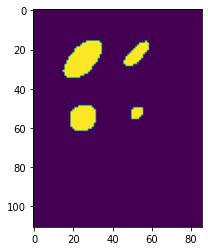

In [329]:
plt.imshow(th1)

In [400]:
contours, hierarchy = cv2.findContours(threshInv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [401]:
img_contours = np.zeros(img.shape)
img_c  = cv2.drawContours(threshInv, contours, -1, (255,0,0))

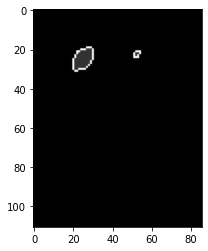

In [402]:
plt.imshow(img_c,cmap='gray')

In [418]:
def defects_search(img):
    x = []
    y = []
    if img.mean() > 100:
        blurred = cv2.GaussianBlur(img, (7, 7), 0)
        cut_blur = blurred[30:,30:,0]
        (T, threshInv) = cv2.threshold(cut_blur, 0, 255,
                cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        contours, hierarchy = cv2.findContours(threshInv, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        if len(contours):
            
        for cnt in contours:
            M = cv2.moments(cnt)
            try:
                cX = int(M["m10"] / M["m00"])+30
                cY = int(M["m01"] / M["m00"])+30
                img_c = cv2.drawContours(img, [cnt+30], -1, (0, 255, 0), 2)
                img_c = cv2.circle(img_c, (cX, cY), 3, (0, 255, 255), -1)
                x.append(cX)
                y.append(cY)
            except ZeroDivisionError:
                pass
            # draw the contour and center of the shape on the image
                
        
    else:
        ret,th1 = cv2.threshold(img[:,:,0],20,255,cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(th1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            M = cv2.moments(cnt)
            cX = int(M["m10"] / M["m00"])
            cY = int(M["m01"] / M["m00"])
            # draw the contour and center of the shape on the image
            img_c = cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)
            img_c = cv2.circle(img_c, (cX, cY), 3, (255, 255, 255), -1)
            x.append(cX)
            y.append(cY)
            
            
            
    return img_c,x,y


# Testing

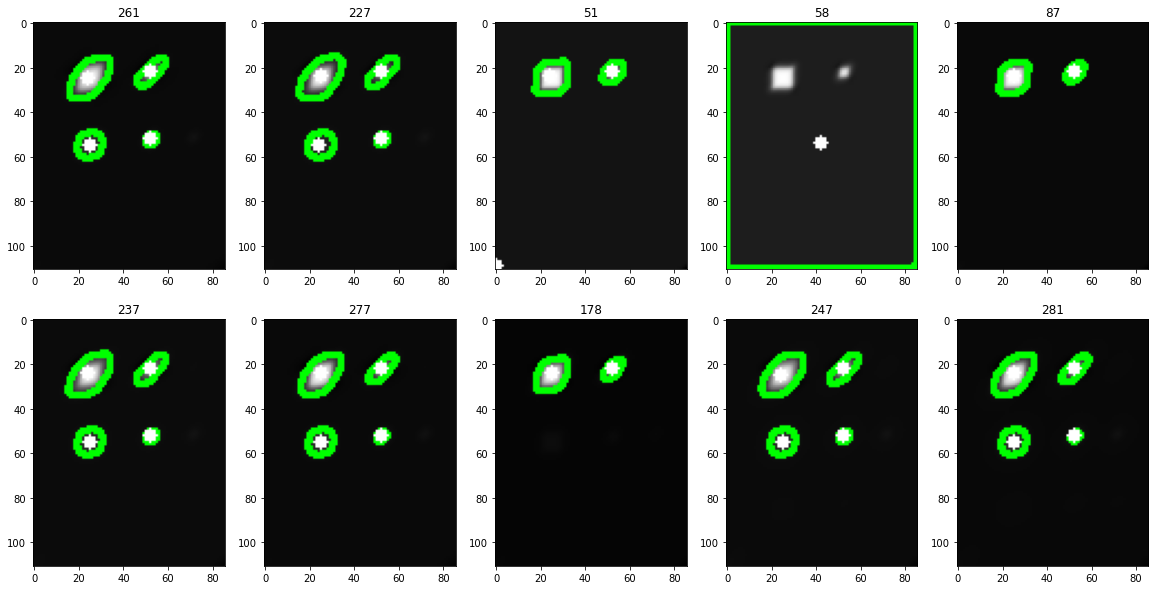

In [426]:
n_pics = 5
fig, ax = plt.subplots(2, n_pics, figsize=(20, 10))
#class_names = train_dataloader.classes
for j in range(0,2):
    for i in range(n_pics):
        num1 = random.randint(1, 286)
        img = cv2.imread(f'./02_output/{num1}.png',1)
        img_contoured,x,y = defects_search(img)

        ax[j,i].imshow(img_contoured,cmap='gray')
        ax[j,i].set_title(num1)
      


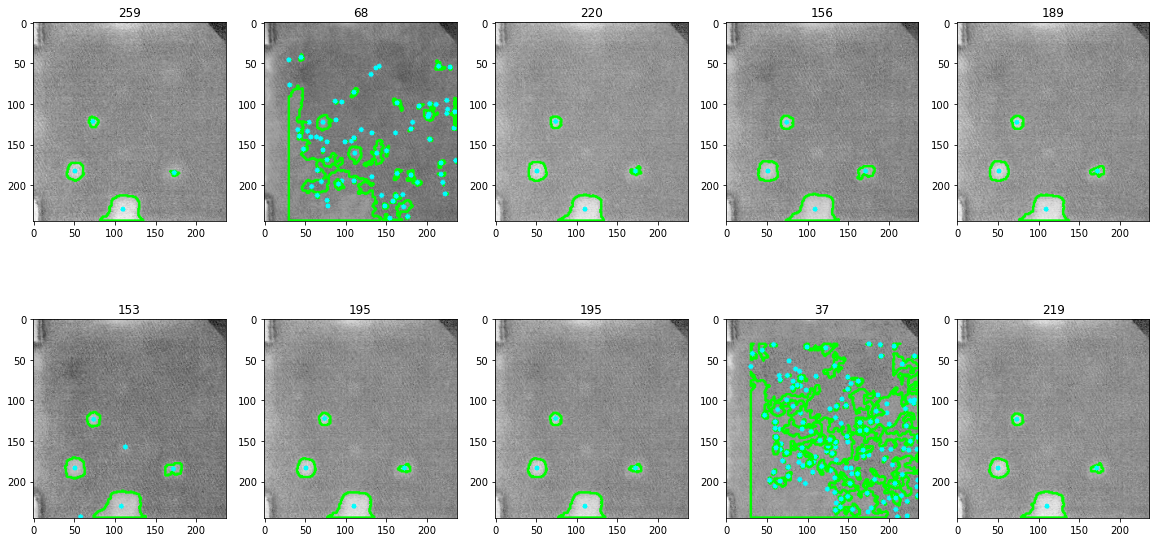

In [427]:
n_pics = 5
fig, ax = plt.subplots(2, n_pics, figsize=(20, 10))
#class_names = train_dataloader.classes
for j in range(0,2):
    for i in range(n_pics):
        num1 = random.randint(0, 286)
        img = cv2.imread(f'./01_output/{num1}.png',1)
        img_contoured,x,y = defects_search(img)

        ax[j,i].imshow(img_contoured,cmap='gray')
        ax[j,i].set_title(num1)
       
